2015-01-02 01:00:00
1
2015-01-03 01:00:00
1
2015-01-04 01:00:00
1
2015-01-05 01:00:00
1
2015-01-06 01:00:00
1
2015-01-07 01:00:00
1
2015-01-08 01:00:00
1
2015-01-09 01:00:00
1


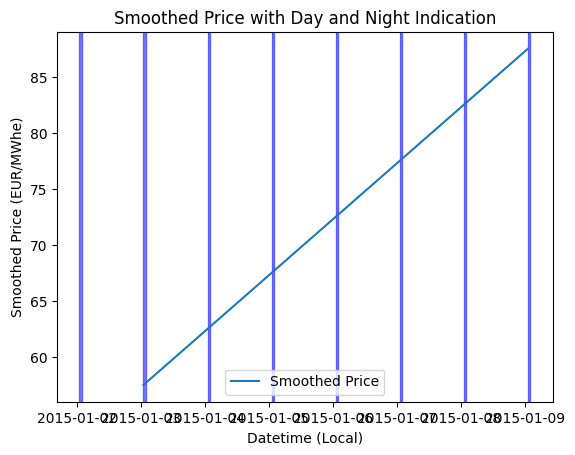

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample DataFrame
data = {
    'Datetime (Local)': ['2015-01-01 01:00:00', '2015-01-02 01:00:00', '2015-01-03 01:00:00', 
                         '2015-01-04 01:00:00', '2015-01-05 01:00:00', '2015-01-06 01:00:00', 
                         '2015-01-07 01:00:00', '2015-01-08 01:00:00', '2015-01-09 01:00:00'],
    'Price (EUR/MWhe)': [50, 55, 60, 65, 70, 75, 80, 85, 90]
}
df = pd.DataFrame(data)

# Convert 'Datetime (Local)' to datetime
df['Datetime (Local)'] = pd.to_datetime(df['Datetime (Local)'])

# Get the last date in the DataFrame
last_date = df['Datetime (Local)'].max()

# Calculate the date one week before the last date
one_week_ago = last_date - pd.DateOffset(weeks=1)

# Filter the DataFrame to include only the last week of data
last_week_df = df[df['Datetime (Local)'] >= one_week_ago].copy()

# Calculate smoothed price
last_week_df.loc[:, 'Smoothed Price (EUR/MWhe)'] = last_week_df['Price (EUR/MWhe)'].rolling(window=2).mean()

# Plotting
fig, ax = plt.subplots()

# Plot the smoothed price
ax.plot(last_week_df['Datetime (Local)'], last_week_df['Smoothed Price (EUR/MWhe)'], label='Smoothed Price')

# Add background color gradient for day and night
for _, row in last_week_df.iterrows():
    print(row['Datetime (Local)'])
    print(row['Datetime (Local)'].hour)
    if row['Datetime (Local)'].hour >= 6 and row['Datetime (Local)'].hour < 18:
        ax.axvspan(row['Datetime (Local)'], row['Datetime (Local)'] + pd.Timedelta(hours=1), color='yellow', alpha=0.5)
    else:

        ax.axvspan(row['Datetime (Local)'], row['Datetime (Local)'] + pd.Timedelta(hours=1), color='blue', alpha=0.5)

# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Datetime (Local)')
plt.ylabel('Smoothed Price (EUR/MWhe)')
plt.title('Smoothed Price with Day and Night Indication')
plt.legend()
plt.show()